## Data Preparation

In [1]:
import pandas as pd

In [3]:
#panggil dataset
df = pd.read_csv('data_retail.csv', sep=';')

#cetak lima data teratas
print(df.head())

#cetak info dataset
print(df.info())

   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no       

In [4]:
#mengubah kolom waktu transaksi kedalam format tanggal
df['First_Transaction']=pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction']=pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [5]:
#Pengecekan transaksi terakhir
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000013


In [6]:
#Klasifikasi customer churn atau tidak dan dimasukkan ke kolom is_churn
df.loc[df['Last_Transaction']<='2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction']>'2018-08-01', 'is_churn'] = False

In [7]:
#menghapus kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

## Visualization 

In [8]:
import matplotlib.pyplot as plt

In [9]:
#Tahun transaksi
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

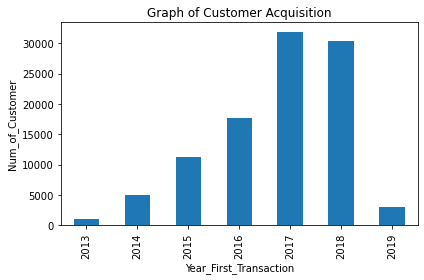

In [10]:
#Plot jumlah customer berdasarkan tahun transaksi pertama
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

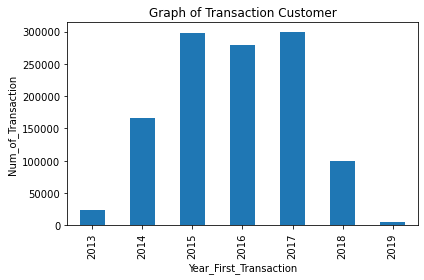

In [11]:
#Plot jumlah transaksi berdasarkan tahun transaksi pertama
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

In [12]:
import seaborn as sns

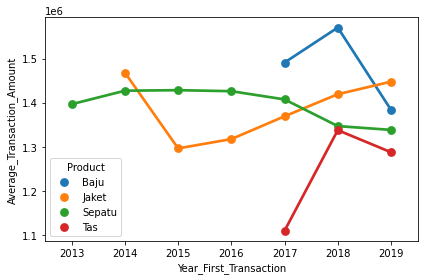

In [13]:
#Nilai transaksi rata-rata berdasarkan transaksi tahun pertama
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
			  x='Year_First_Transaction',
			  y='Average_Transaction_Amount',
			  hue='Product')
plt.tight_layout()
plt.show()

In [14]:
#pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn',
						columns='Product',
						values='Customer_ID',
						aggfunc='count',
						fill_value=0)

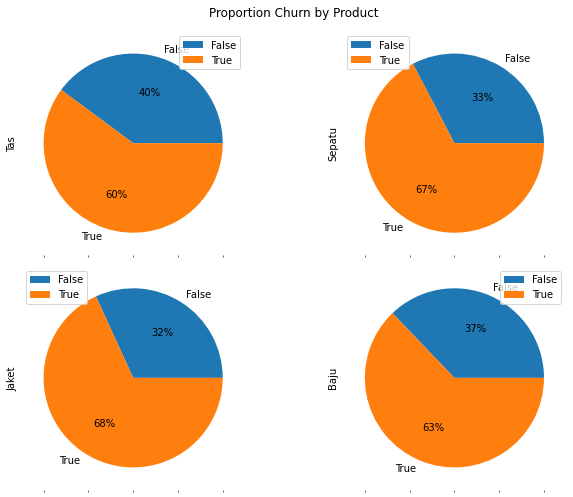

In [15]:
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
				figsize=(10, 7),
				layout=(-1, 2),
				autopct='%1.0f%%',
				title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

In [16]:
# Kategorisasi jumlah transaksi
def func(row):
	if row['Count_Transaction'] == 1:
		val = '1. 1'
	elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
		val ='2.2 - 3'
	elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
		val ='3.4 - 6'
	elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
		val ='4.7 - 10'
	else:
		val ='5.>10'
	return val

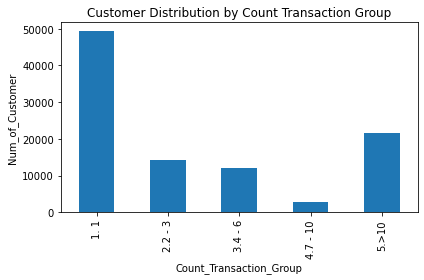

In [17]:
# menambah kolom count_transasction_group
df['Count_Transaction_Group'] = df.apply(func, axis=1)

#plot jumlah customer berdasarkan count_transasction_group
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [18]:
# Kategorisasi rata-rata besar nilai transaksi
def f(row):
	if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
	    val ='1. 100.000 - 250.000'
	elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
	    val ='2. >250.000 - 500.000'
	elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
	    val ='3. >500.000 - 750.000'
	elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
	    val ='4. >750.000 - 1.000.000'
	elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
	    val ='5. >1.000.000 - 2.500.000'
	elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
	    val ='6. >2.500.000 - 5.000.000'
	elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
	    val ='7. >5.000.000 - 10.000.000'
	else:
	    val ='8. >10.000.000'
	return val

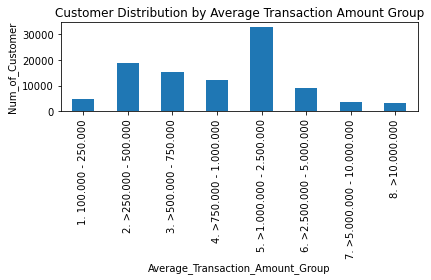

In [19]:
# Menambahkan kolom average_transaction_amount_group
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

#plot average_transaction_amount_group berdasarkan jumlah customer
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

## Modelling 

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
df['is_churn'] = LabelEncoder().fit_transform(df['is_churn'])

In [23]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

In [24]:
# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

In [25]:
# Predictor variable
X = df[feature_columns]

# Target variable
y = df['is_churn']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#membagi dataset menjadi training 75% dan testing 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [32]:
# Inisiasi model log_model dan menerapkan ke data train
log_model=LogisticRegression().fit(X_train,y_train)

y_train_pred = log_model.predict(X_train)

In [33]:
# Evaluasi model train menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)
print('Confusion Matrix for Training Model (Logistic Regression)\n', cnf_matrix)
print('Classification Report Training Model (Logistic Regression) :\n', report)

Confusion Matrix for Training Model (Logistic Regression)
 [[    5 25095]
 [   11 49889]]
Classification Report Training Model (Logistic Regression) :
               precision    recall  f1-score   support

           0       0.31      0.00      0.00     25100
           1       0.67      1.00      0.80     49900

    accuracy                           0.67     75000
   macro avg       0.49      0.50      0.40     75000
weighted avg       0.55      0.67      0.53     75000



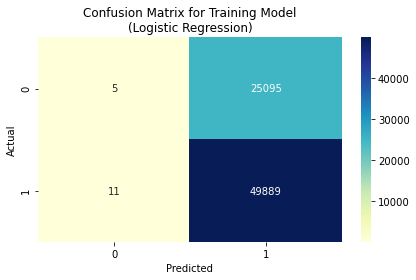

In [34]:
#Evaluasi model testing menggunakan plot confusion matrix
class_names = [0, 1] # 0=Churn & 1=Tidak churn
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion Matrix for Training Model\n(Logistic Regression)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [35]:
y_test_pred = log_model.predict(X_test)

In [36]:
# Evaluasi model train menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
print('Confusion Matrix for Testing Model (Logistic Regression)\n', cnf_matrix)
print('Classification Report Testing Model (Logistic Regression) :\n', report)

Confusion Matrix for Testing Model (Logistic Regression)
 [[    1  8330]
 [    3 16666]]
Classification Report Testing Model (Logistic Regression) :
               precision    recall  f1-score   support

           0       0.25      0.00      0.00      8331
           1       0.67      1.00      0.80     16669

    accuracy                           0.67     25000
   macro avg       0.46      0.50      0.40     25000
weighted avg       0.53      0.67      0.53     25000



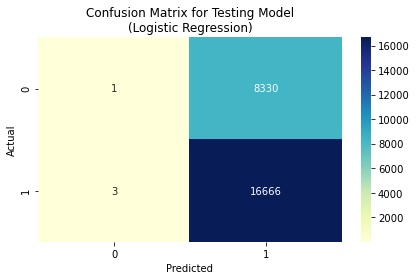

In [37]:
#Evaluasi model testing menggunakan plot confusion matrix
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()